In [1]:
# Import the class
import kmapper as km

# Some sample data
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)

# Initialize
mapper = km.KeplerMapper(verbose=1)

# Fit to and transform the data
projected_data = mapper.fit_transform(data, projection=[0]) # X-Y axis

# Create dictionary called 'graph' with nodes, edges and meta-information
graph = mapper.map(projected_data, data, cover=km.Cover(n_cubes=10))

# Visualize it
mapper.visualize(graph, path_html="make_circles_keplermapper_output.html",
                 title="make_circles(n_samples=5000, noise=0.03, factor=0.3)")

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: [0]
	Distance matrices: False
	Scalers: MinMaxScaler(copy=True, feature_range=(0, 1))
..Projecting on data shaped (5000, 2)

..Projecting data using: [0]

..Scaling with: MinMaxScaler(copy=True, feature_range=(0, 1))

Mapping on data shaped (5000, 2) using lens shaped (5000, 1)

Creating 10 hypercubes.

Created 21 edges and 22 nodes in 0:00:00.219473.
Wrote visualization to: make_circles_keplermapper_output.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>make_circles(n_samples=5000, noise=0.03, factor=0.3) | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  position: absolute;\n  right: 00px;\n  top: 0px;\n  width: 90px;\n  height: 90px;\n  z-index: 999999;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  t

In [2]:
from scipy.spatial.distance import pdist, squareform
import sklearn

mapper2 = km.KeplerMapper(verbose=1)

dist = squareform(pdist(data))

graph2 = mapper2.map(projected_data, dist, precomputed=True, nr_cubes=10,clusterer=sklearn.cluster.DBSCAN(metric='precomputed'))

# Visualize it
mapper.visualize(graph2, path_html="mapper2.html",
                 title="mapper2.map(dist, precomputed=True, nr_cubes=10)")

KeplerMapper()
Mapping on data shaped (5000, 5000) using lens shaped (5000, 1)

Creating 10 hypercubes.

Created 21 edges and 22 nodes in 0:00:01.307056.
Wrote visualization to: mapper2.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>mapper2.map(dist, precomputed=True, nr_cubes=10) | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  position: absolute;\n  right: 00px;\n  top: 0px;\n  width: 90px;\n  height: 90px;\n  z-index: 999999;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-

In [7]:
import pandas
data_fm = pandas.DataFrame( data )
data_proj_fm = pandas.DataFrame( projected_data )
dist_fm = pandas.DataFrame( dist )

In [8]:
data_proj_fm.describe()

,0
count,5000.000000
mean,0.494066
std,0.246842
min,0.000000
25%,0.359240
50%,0.491954
75%,0.629444
max,1.000000


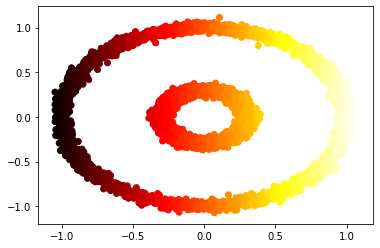

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm

plt.scatter(data_fm.iloc[:,0] , data_fm.iloc[:,1] , c = data_proj_fm.iloc[:,0], cmap=cm.hot)

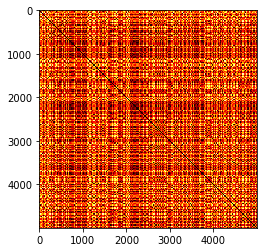

In [12]:
plt.imshow(dist_fm, cmap='hot', interpolation='nearest')
plt.show()

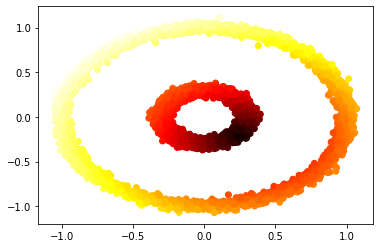

In [13]:
plt.scatter(data_fm.iloc[:,0] , data_fm.iloc[:,1] , c = dist_fm.iloc[:,500], cmap=cm.hot)

In [17]:

mapper3 = km.KeplerMapper(verbose=1)

graph3 = mapper2.map(dist_fm.iloc[:,[20,500]], dist, precomputed=True, nr_cubes=10,clusterer=sklearn.cluster.DBSCAN(metric='precomputed'))

# Visualize it
mapper.visualize(graph3, path_html="mapper3.html",
                 title="mapper3.map(dist, precomputed=True, nr_cubes=10)")

KeplerMapper()
Mapping on data shaped (5000, 5000) using lens shaped (5000, 2)

Creating 100 hypercubes.

Created 103 edges and 53 nodes in 0:00:01.094116.
Wrote visualization to: mapper3.html


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>mapper3.map(dist, precomputed=True, nr_cubes=10) | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  position: absolute;\n  right: 00px;\n  top: 0px;\n  width: 90px;\n  height: 90px;\n  z-index: 999999;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-